In [271]:
from PIL import Image, ImageDraw, Image, ImageFont, ImageColor, ImageOps
from transformers import LayoutLMv3FeatureExtractor
from pathlib import Path
import json
from datetime import datetime

In [290]:
features = LayoutLMv3FeatureExtractor()
def copyandpastepdf(data,sourceimage):
    blankImage = Image.new("RGB", (1660, 2340), (255, 255, 255))
    data = data.split('\n')
    data = [d.split(' ') for d in data]
    cropImages = []
    cropLocation = []
    name = []
    counter = 0
    for b in data: 
        try:
            b = [int(a) for a in b]
            cropped = sourceimage.crop(tuple(b))
            cropImages.append(cropped)
            cropLocation.append(b)
            blankImage.paste(cropped,(b[0],b[1]))
            extracted_words = ' '.join(features(cropped)['words'][0])
            name.append(extracted_words)
            cropped.save(f'croppedData/{extracted_words}x{counter}.png')
            counter += 1
        except: pass  
    crop_dict = {}
    counter = 0
    for i,l,n in zip(cropImages,cropLocation,name):
        crop_dict[n] = {
            'box':l,
            'savefolder':f'croppedData/{n}x{counter}.png'
            }
        counter += 1
    now = datetime.now()
    dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
    path = Path(f'croppedData/croppedData{dt_string}.json')
    with open(str(path),'w') as file:
        json.dump(crop_dict,file,indent=2)
        file.close()  
    print(str(path))
    return crop_dict,blankImage

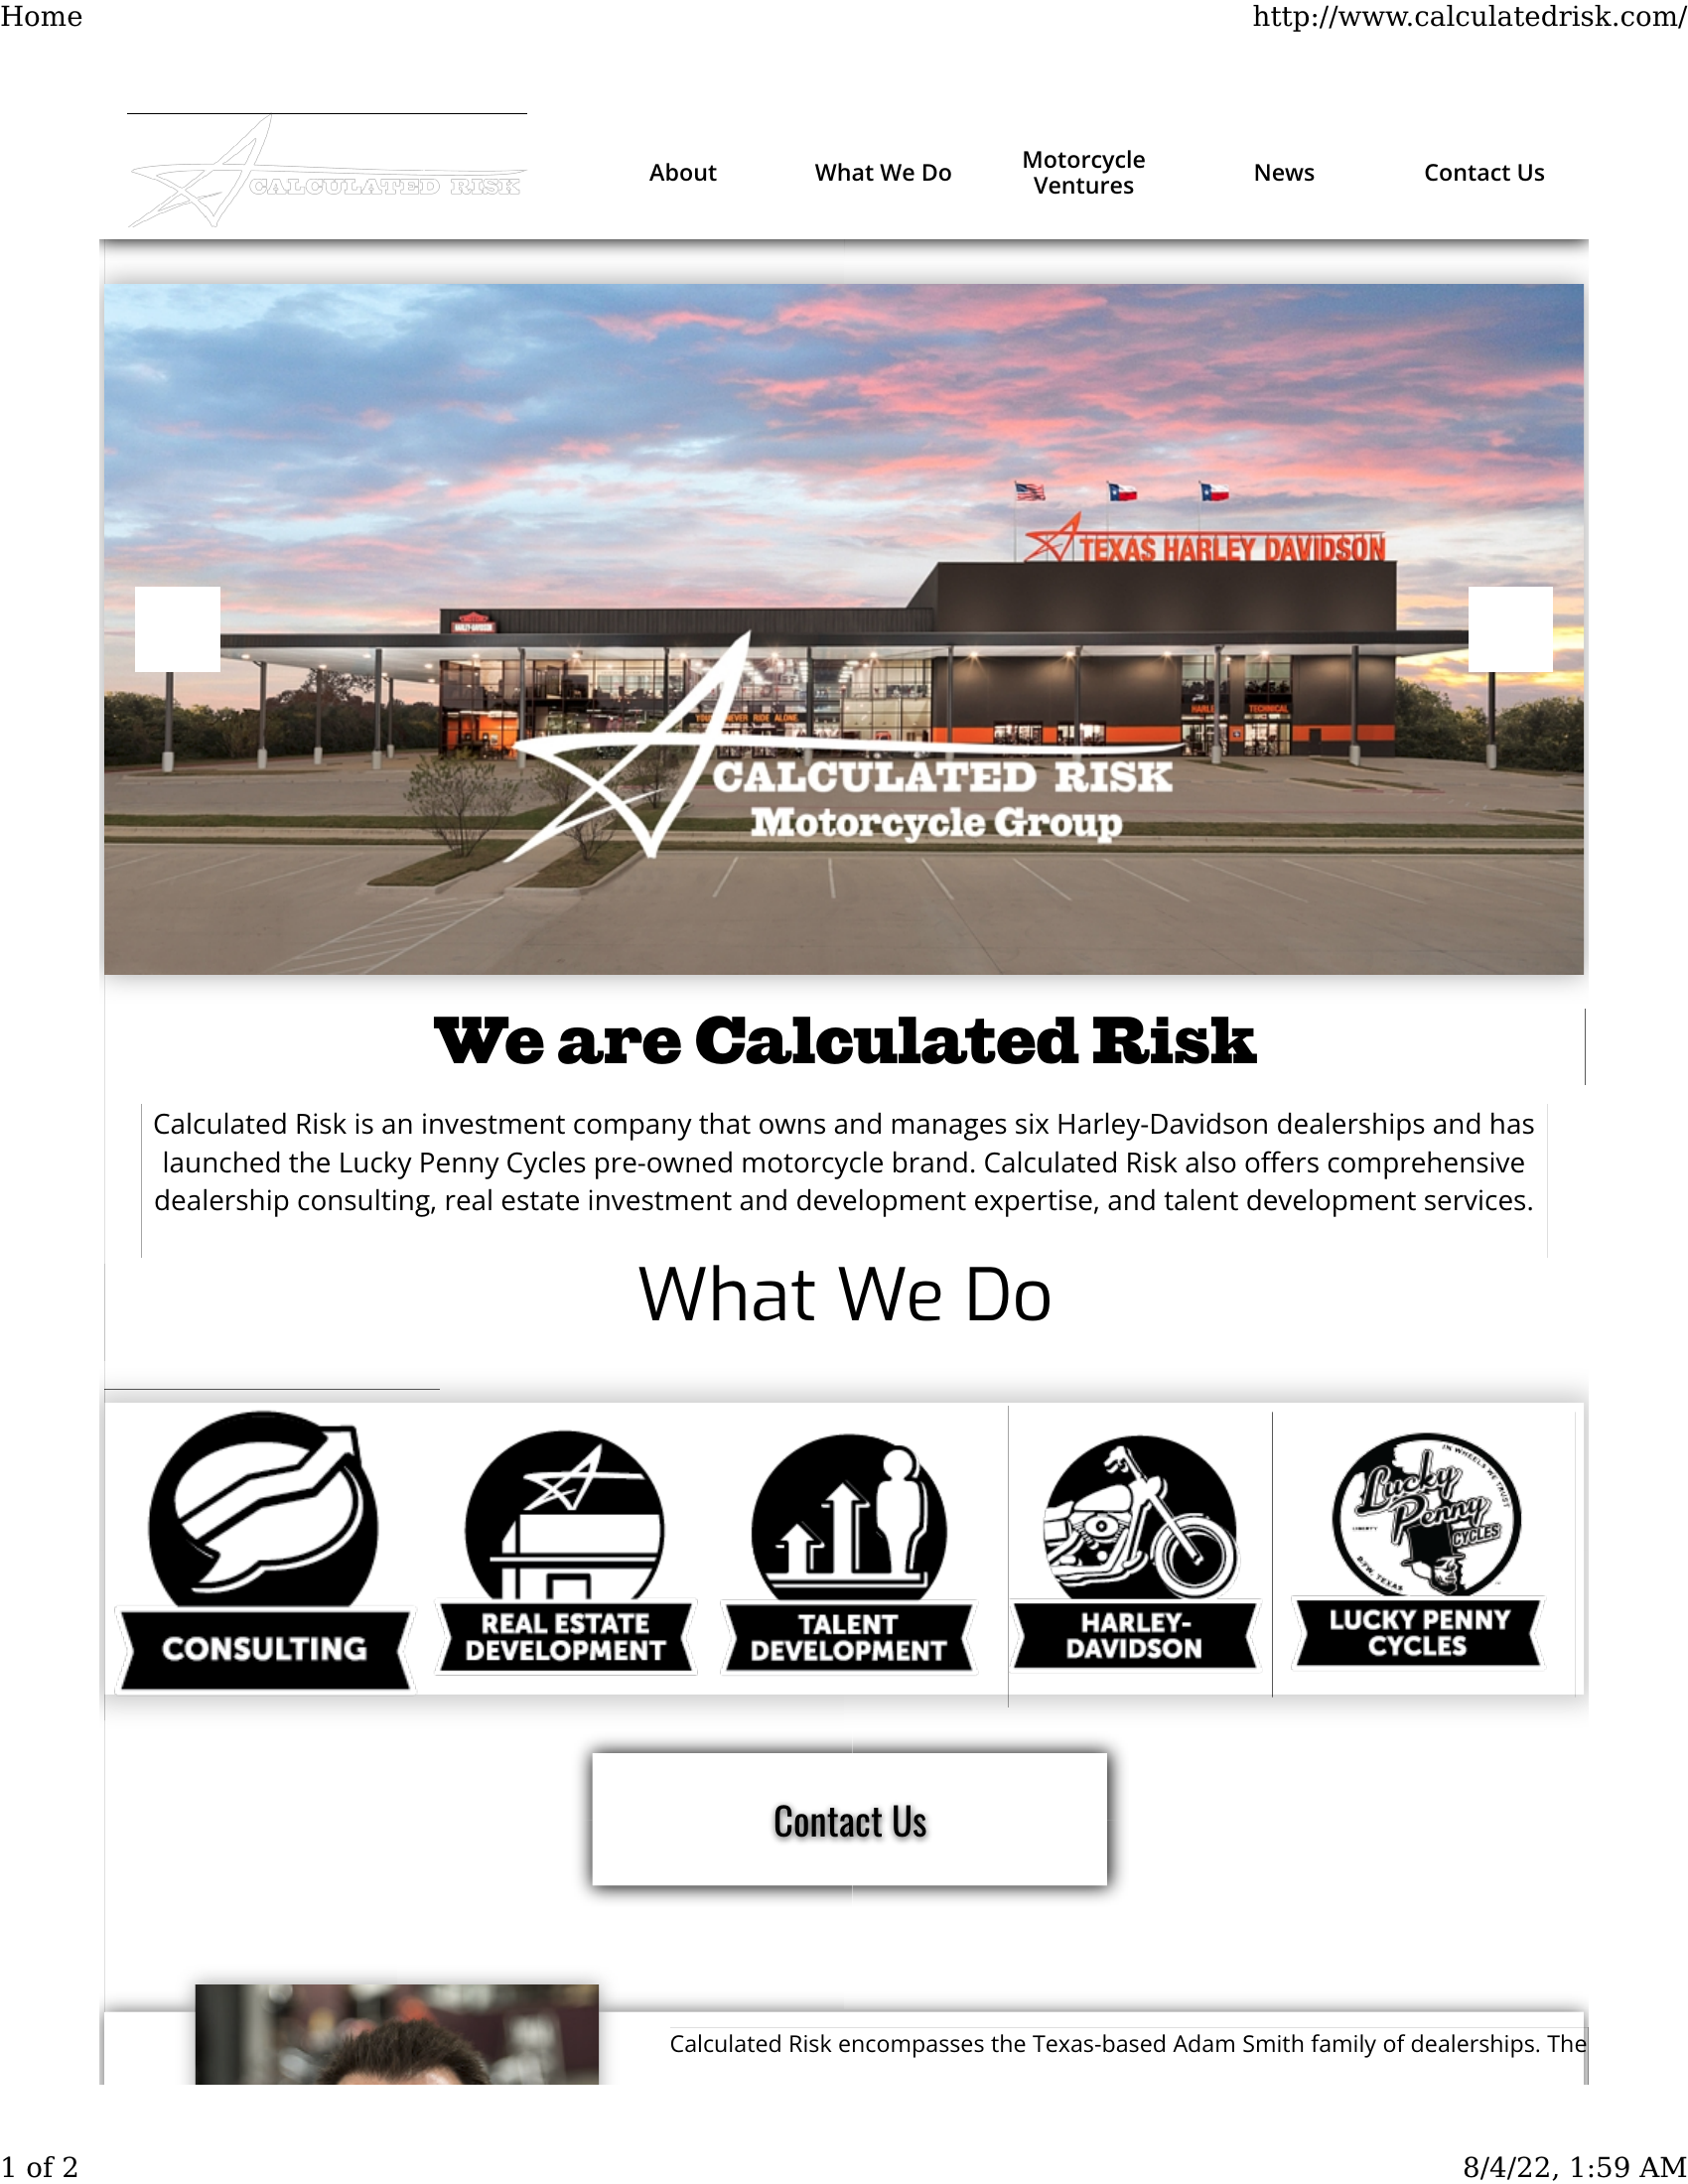

In [291]:
image = Image.open('Home_page_1.png')
image

In [305]:
#quickly using the 'snipped tool' to copy all image boxes at once
data = '''627 136 1583 205
416 1004 1280 1086
615 1257 1074 1346
722 1416 990 1694
742 1785 960 1867'''

In [325]:
dic,img = copyandpastepdf(data,image)

croppedData/croppedData04_08_2022_02_25_01.json


In [307]:
with open('croppedData/croppedData04_08_2022_02_04_05.json', 'r') as file:
    copyandpaste = json.load(file)
    file.close()

In [308]:
copyandpaste

{'Motorcycle About What We Do Ventures News Contact Us': {'box': [627,
   136,
   1583,
   205],
  'savefolder': 'croppedData/Motorcycle About What We Do Ventures News Contact Usx0.png'},
 '': {'box': [722, 1416, 990, 1694], 'savefolder': 'croppedData/x4.png'},
 'We are Calculated Risk': {'box': [416, 1004, 1280, 1086],
  'savefolder': 'croppedData/We are Calculated Riskx2.png'},
 'What We Do': {'box': [615, 1257, 1074, 1346],
  'savefolder': 'croppedData/What We Dox3.png'},
 'Contact Us': {'box': [742, 1785, 960, 1867],
  'savefolder': 'croppedData/Contact Usx5.png'}}

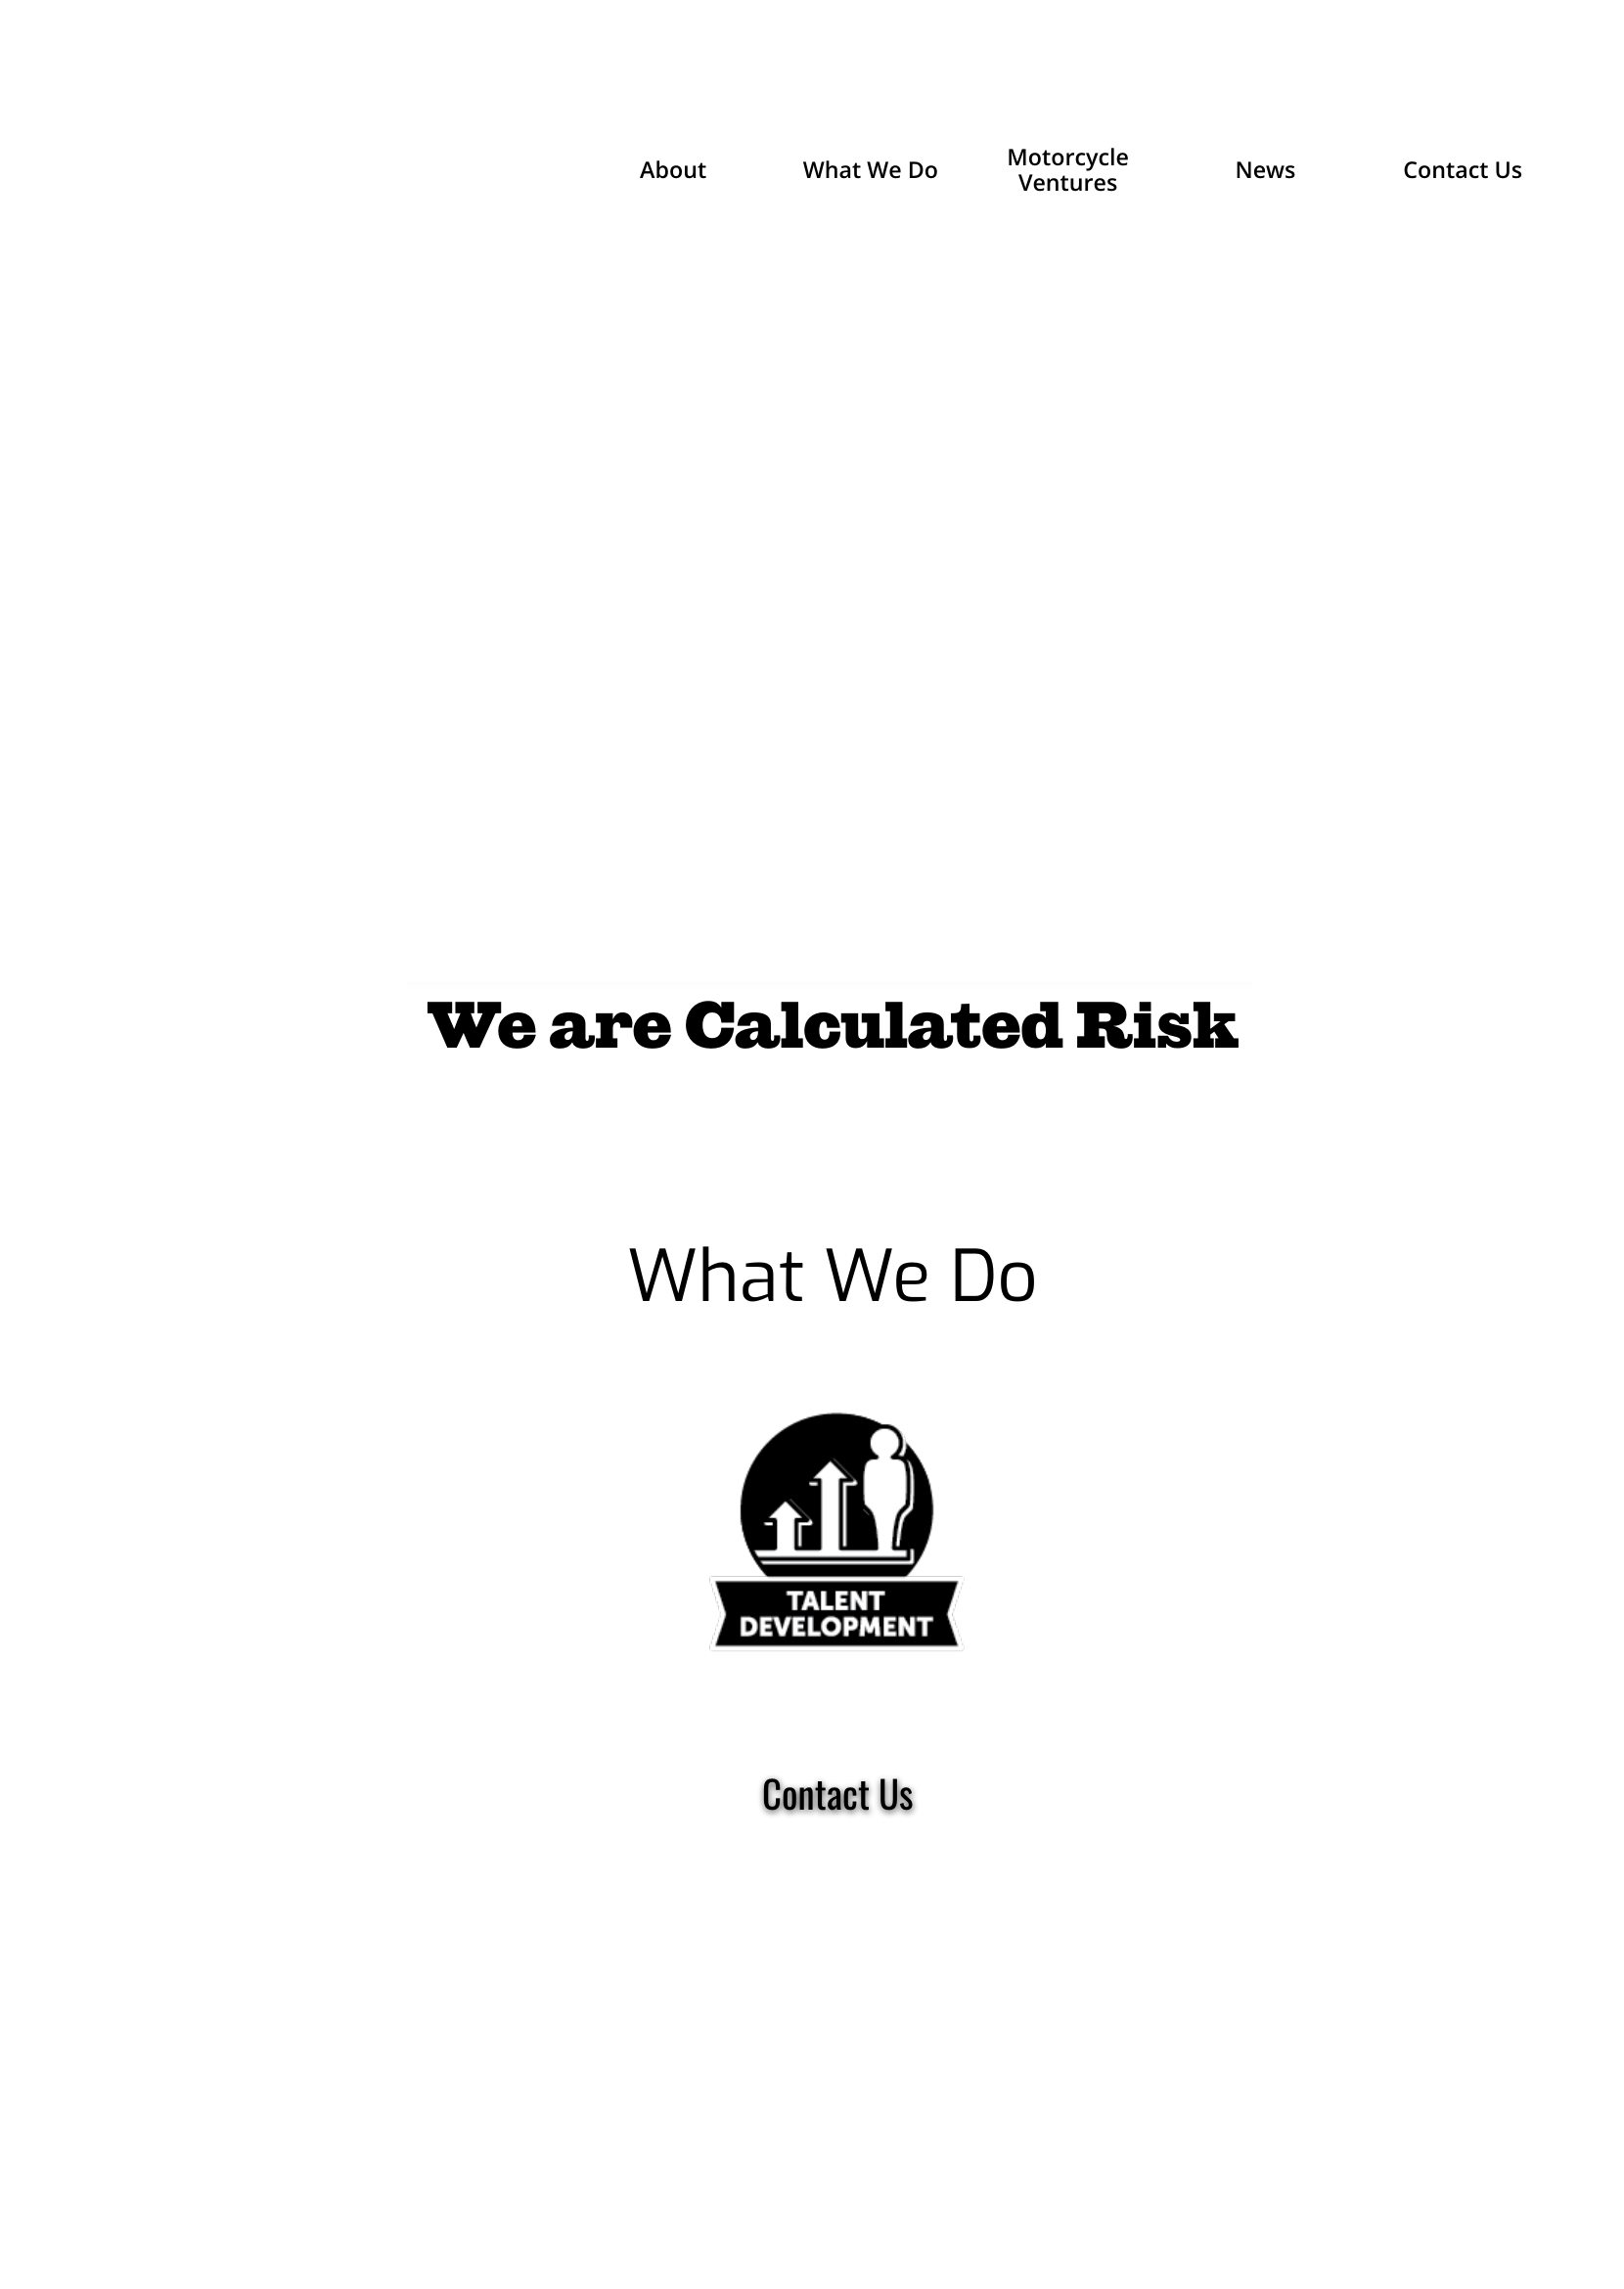

In [326]:
img
# with the above skeleton, now we can fill in the blank, or shift everything around 
# with our own content to synthesize data